In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('../input/bank-customer-churn-modeling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('RowNumber',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

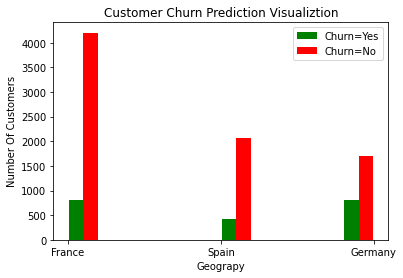

In [8]:
geo_churn_no = df[df.Exited==0].Geography
geo_churn_yes = df[df.Exited==1].Geography

plt.xlabel("Geograpy")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([geo_churn_yes, geo_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [9]:
df.Geography.replace({'France': 1, 'Spain': 2, 'Germany': 3}, inplace=True)

In [10]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

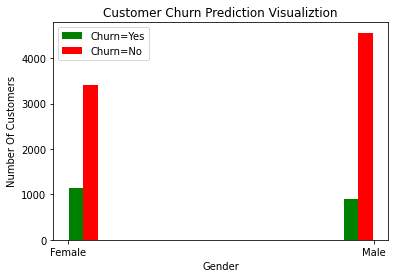

In [11]:
geo_churn_no = df[df.Exited==0].Gender
geo_churn_yes = df[df.Exited==1].Gender

plt.xlabel("Gender")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([geo_churn_yes, geo_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [12]:
df.Gender.replace({'Female': 0, 'Male': 1}, inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


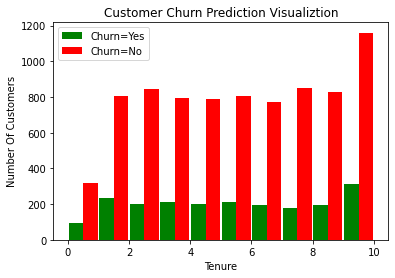

In [14]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [15]:
cols = ['Tenure','Age','CreditScore', 'Balance', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,2,0,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,1,0,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,1,0,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,2,0,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [16]:
X = df.drop('Exited',axis='columns')
y = df.Exited

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

In [17]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(10, input_shape=(10,), activation='relu'),
                          keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 932us/step - loss: 0.7690 - accuracy: 0.4962
Epoch 2/100
250/250 [==============================] - 0s 933us/step - loss: 0.4789 - accuracy: 0.8009
Epoch 3/100
250/250 [==============================] - 0s 946us/step - loss: 0.4616 - accuracy: 0.8011
Epoch 4/100
250/250 [==============================] - 0s 998us/step - loss: 0.4518 - accuracy: 0.8054
Epoch 5/100
250/250 [==============================] - 0s 924us/step - loss: 0.4540 - accuracy: 0.8043
Epoch 6/100
250/250 [==============================] - 0s 996us/step - loss: 0.4297 - accuracy: 0.8157
Epoch 7/100
250/250 [==============================] - 0s 924us/step - loss: 0.4201 - accuracy: 0.8193
Epoch 8/100
250/250 [==============================] - 0s 957us/step - loss: 0.4191 - accuracy: 0.8172
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8278
Epoch 10/100
250/250 [==============================] - 0s 978us/step - los

In [18]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 896us/step - loss: 0.3632 - accuracy: 0.8525


[0.3632090389728546, 0.8525000214576721]

In [19]:
pred = model.predict(X_test)

prediction = []
for element in pred:
    if element > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

Text(69.0, 0.5, 'Truth')

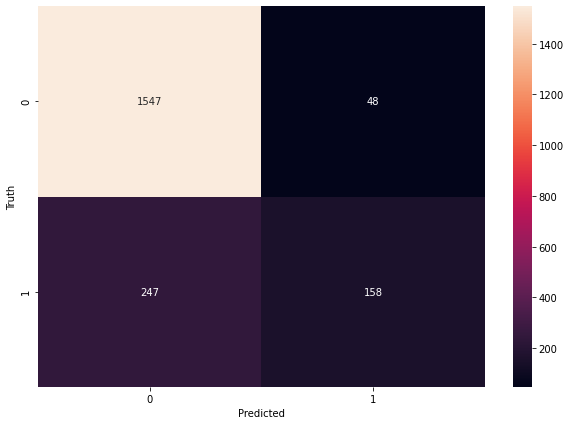

In [20]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=prediction)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.77      0.39      0.52       405

    accuracy                           0.85      2000
   macro avg       0.81      0.68      0.72      2000
weighted avg       0.84      0.85      0.83      2000



In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [23]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(10,), activation='relu'),
                          keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6617 - accuracy: 0.6201
Epoch 2/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.6723
Epoch 3/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.7012
Epoch 4/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.7246
Epoch 5/100
399/399 [==============================] - 0s 948us/step - loss: 0.5248 - accuracy: 0.7379
Epoch 6/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.7512
Epoch 7/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7559
Epoch 8/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5068 - accuracy: 0.7538
Epoch 9/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.7458
Epoch 10/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4874 - accu

In [24]:
pred = model.predict(X_test)

prediction = []
for element in pred:
    if element > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1593
           1       0.81      0.75      0.78      1593

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186

